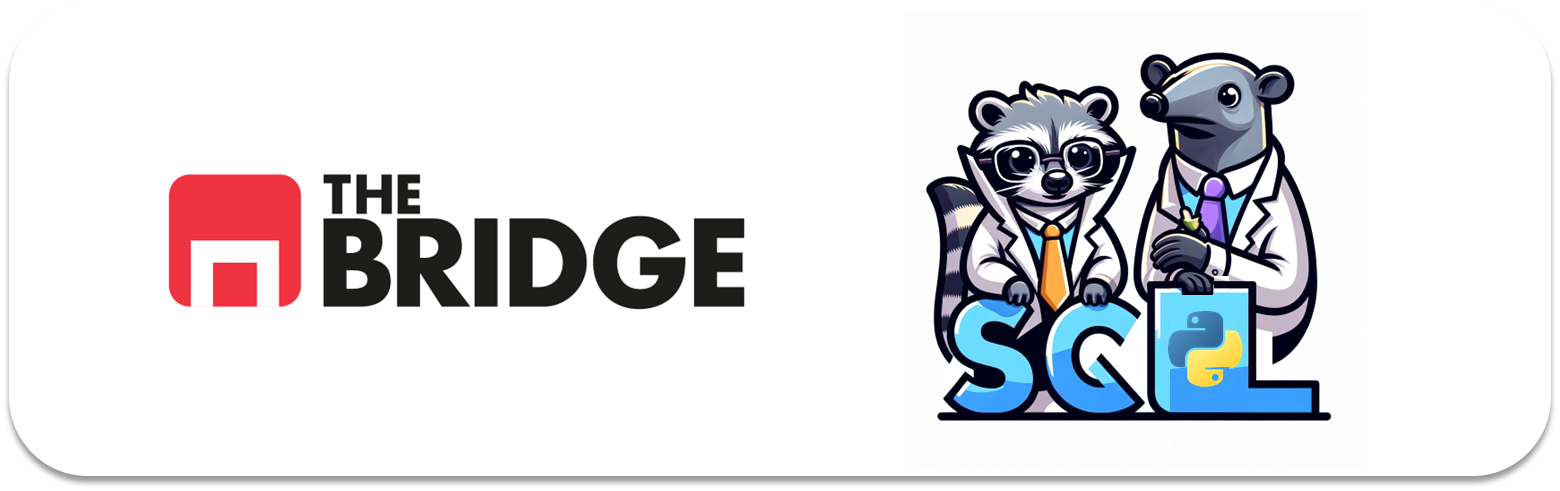

# SQL en Python: Primeras Queries

En la sesión anterior vimos como conectarnos a una base de datos (bueno a un fichero) y sobre todo como crear un cursor y utilizarlo para consultar la base de datos. Pero se nos quedó pendiente ver cómo podíamos saber que tablas tiene una base de datos y así ya poder empezar a trabajar de forma práctica sobre SQL. Eso vamos a hacer en esta sesión. Lo primero imports y carga la base de datos:


In [1]:
import pandas as pd
import sqlite3

# Conectamos con la base de datos chinook.db
connection = sqlite3.connect("data/chinook.db")

# Obtenemos un cursor que utilizaremos para hacer las queries
cursor_bootcamp = connection.cursor()

### Tablas y Schema

Para ver las tablas que hay en una base de datos con la que hemos establecido conexión en el caso de sqlite3:

In [4]:
resultado = cursor_bootcamp.execute("SELECT name FROM  sqlite_master WHERE type = 'table'")# hacemos un select sobre la tabla maestra(esta tabla es donde estan todas las tablas de una base de datos), que tipo de datos tienen y sus relaciones.
#es el catalogo de nuestra BDD. En sqlite se llama asi pero en otras BD a traves de python y conseguir el nombre de las tablas maestras
tablas =[]
for name in resultado:

    print(name[0])
    tablas.append(name[0])# aqui tenemos todas las tablas

albums
sqlite_sequence
artists
customers
employees
genres
invoices
invoice_items
media_types
playlists
playlist_track
tracks
sqlite_stat1
films


Fíjate que hemos empleado una consulta (SELECT) sql sobre una tabla, que se denomina maestra, y le hemos pasado la query al gesto a través del cursor.

Ahora podríamos recorrer todas las tablas y sacar sus nombres de columnas o podríamos investigar las columnas de esa tabla maestra y de ahí obtener el modelo de datos. Recuerda que el modelo de datos de una Base de Datos relacional es el mapa de todas las tablas de esa Base de Datos con el nombre de sus campos, el tipo de valores que guardan esos campos y las relaciones que hay entre las tablas. 

### Modelo de datos
Antes de empezar a atacar una base de datos, tendremos que saber qué hay dentro, y para ello lo mejor es ver cómo es su **modelo de datos**. Como he comentado podríamos intentar sacarlo de los nombres de los campos de las tablas o bien utilizar otros módulos externos o herramientas externas, pero dado que nosotros seremos principalmente consumidores, lo más efectivo será preguntar por él.

En nuestro caso (la base Chinook de ventas de musica onlie) este es el modelo:


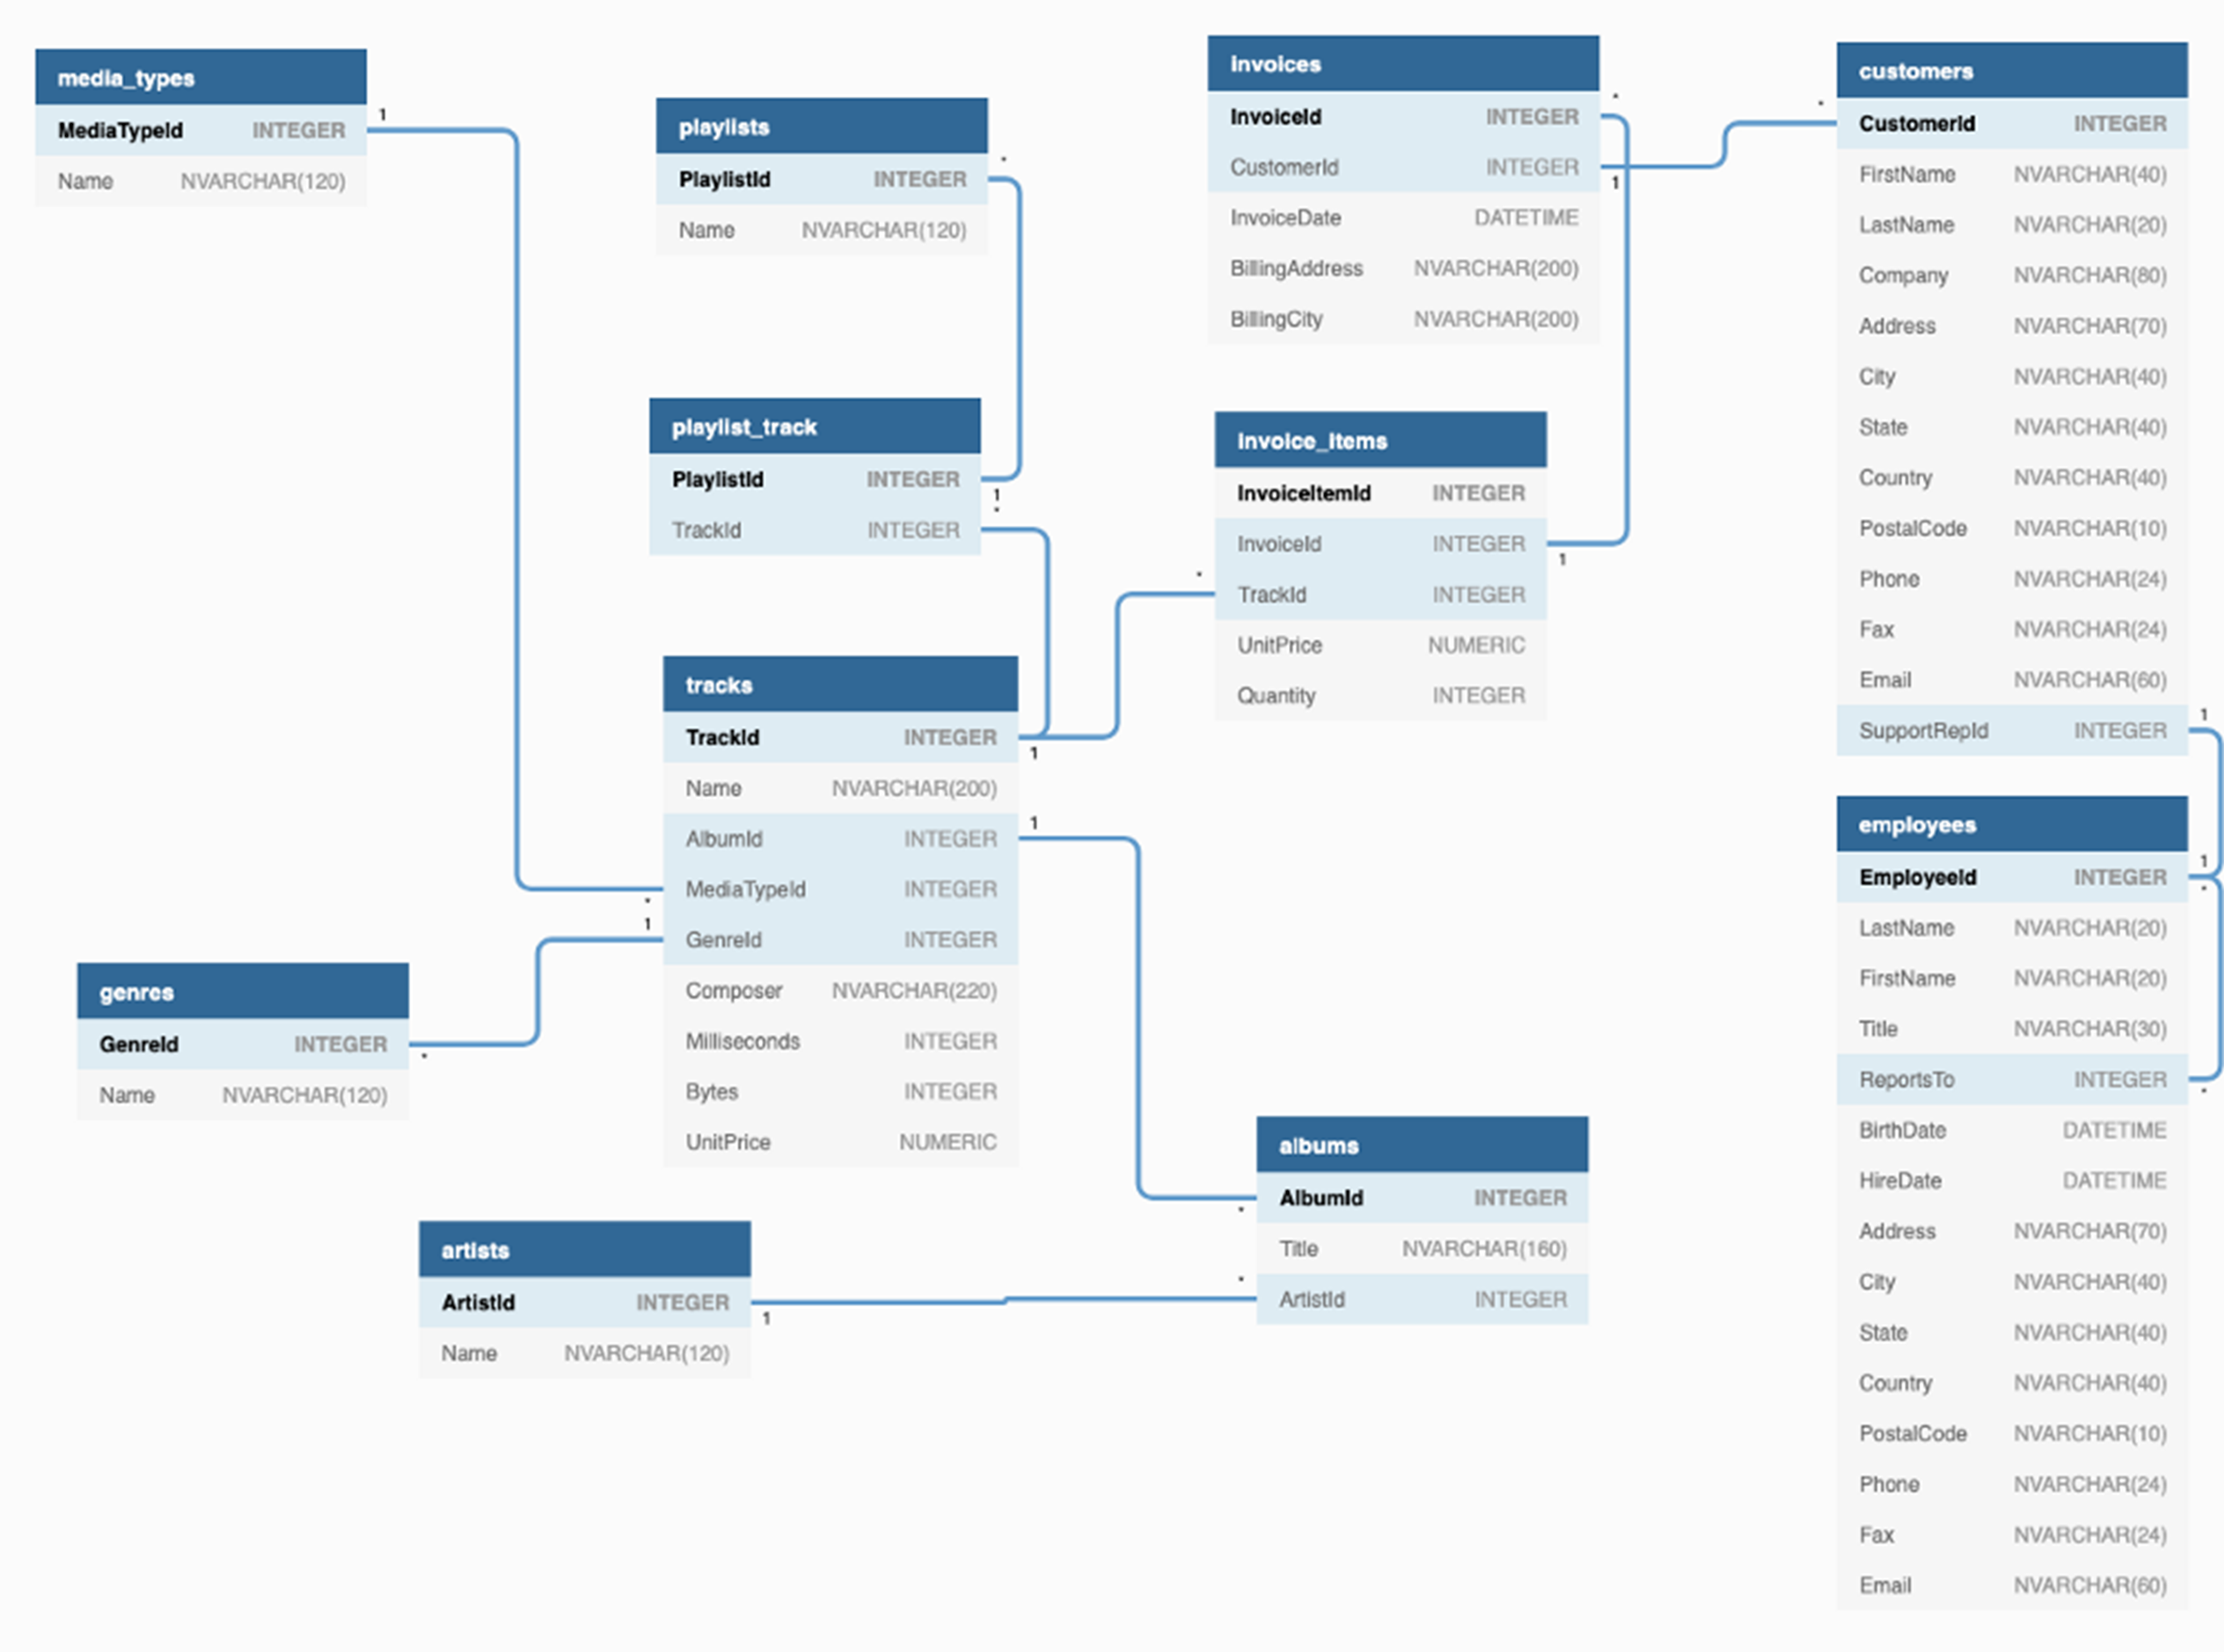

### Primeras queries con SELECT

De la sesión de introducción recordarás que la sintáxis básica de una sentencia o query SELECT tiene esta pinta:
```SQL
SELECT campo1, campo2, campo3...
FROM tabla
WHERE condiciones
ORDER BY campo1, campo2 (DESC)
LIMIT num_filas
```

Por supuesto, hay más sentencias propias de SQL que iremos viendo a lo largo de la unidad, y del bootcamp. Fíjate que las **palabras reservadas en SQL se suelen poner en mayúsculas**, para diferenciarlas del resto. No da error si se pone de otra manera, ya que SQL **no es *case sensitive***, pero sí se suele hacer así.

En lo que queda de sesión vamos a hacer nuestras primeras queries, muy sencillas, para que vayas familiarizandote y ya en los ejercicios tendrás mucho donde practicar.

#### SELECT *

Ya la hicimos sobre la tabla `employees` en la sesión anterior provemos ahora con otras tablas

In [5]:
query = '''
SELECT * 
FROM tracks
'''


Como puedes ver se suele utilizar las triple comilla y la consulta en varias líneas segúna la parte del SELECT que corresponda, pero no es imperativo, puedes poner toda la sentencia en una sóla línea tal y como hemos hecho al consultar el nombre de todas las tablas contenidas en la base de datos. Completemos la ejecución y volquemos a un `DataFrame` tal y como vimos:

In [8]:
cursor_bootcamp.execute(query) # 1 hago el execute de la query
resultado = cursor_bootcamp.fetchall()# lo que quiero conseguir en tesecado all, pero podria ser la primera o laguna many
columnas= [col[0] for col in cursor_bootcamp.description]# descriptor de las columnas con una lista de progresion
df= pd.DataFrame(resultado, columns=columnas)# hago el dataframe
df

TrackId                                               Name  AlbumId  \
0           1            For Those About To Rock (We Salute You)        1   
1           2                                  Balls to the Wall        2   
2           3                                    Fast As a Shark        3   
3           4                                  Restless and Wild        3   
4           5                               Princess of the Dawn        3   
...       ...                                                ...      ...   
3498     3499  Pini Di Roma (Pinien Von Rom) \ I Pini Della V...      343   
3499     3500  String Quartet No. 12 in C Minor, D. 703 "Quar...      344   
3500     3501               L'orfeo, Act 3, Sinfonia (Orchestra)      345   
3501     3502  Quintet for Horn, Violin, 2 Violas, and Cello ...      346   
3502     3503                                      Koyaanisqatsi      347   

      MediaTypeId  GenreId                                           Composer  \
0               1        1          Angus Young, Malcolm Young, Brian Johnson   
1               2        1                                               None   
2               2        1  F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...   
3               2        1  F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...   
4               2        1                         Deaffy & R.A. Smith-Diesel   
...           ...      ...                                                ...   
3498            2       24                                               None   
3499            2       24                                     Franz Schubert   
3500            2       24                                 Claudio Monteverdi   
3501            2       24                            Wolfgang Amadeus Mozart   
3502            2       10                                       Philip Glass   

      Milliseconds     Bytes  UnitPrice  
0           343719  11170334       0.99  
1           342562   5510424       0.99  
2           230619   3990994       0.99  
3           252051   4331779       0.99  
4           375418   6290521       0.99  
...            ...       ...        ...  
3498        286741   4718950       0.99  
3499        139200   2283131       0.99  
3500         66639   1189062       0.99  
3501        221331   3665114       0.99  
3502        206005   3305164       0.99  

[3503 rows x 9 columns]

### Selección de campos

Seleccionemos ahora algunos campos únicamente y además cambiémosle el nombre al vuelo, mediante la sintaxis `campo as nuevo_nombre`. **Si quieres poner espacios en el nombre del campo, tendrás que rodear el string con comillas dobles**

Y recuerda: SQL no es sensible a mayusculas y minusculas. ("este_CampO" == "ESTE_CAMPO")

In [10]:
query = '''
SELECT name AS "Nombre Cancion", composer as "Compositor"
FROM tracks
'''
 # si le hubiera puesto un _ en medio de los nombres no era necesario usar ""
cursor_bootcamp.execute(query) # 1 hago el execute de la query
resultado = cursor_bootcamp.fetchall()# lo que quiero conseguir en tesecado all, pero podria ser la primera o laguna many
columnas= [col[0] for col in cursor_bootcamp.description]# descriptor de las columnas con una lista de progresion
df= pd.DataFrame(resultado, columns=columnas)# hago el dataframe
df

Nombre Cancion  \
0               For Those About To Rock (We Salute You)   
1                                     Balls to the Wall   
2                                       Fast As a Shark   
3                                     Restless and Wild   
4                                  Princess of the Dawn   
...                                                 ...   
3498  Pini Di Roma (Pinien Von Rom) \ I Pini Della V...   
3499  String Quartet No. 12 in C Minor, D. 703 "Quar...   
3500               L'orfeo, Act 3, Sinfonia (Orchestra)   
3501  Quintet for Horn, Violin, 2 Violas, and Cello ...   
3502                                      Koyaanisqatsi   

                                             Compositor  
0             Angus Young, Malcolm Young, Brian Johnson  
1                                                  None  
2     F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...  
3     F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...  
4                            Deaffy & R.A. Smith-Diesel  
...                                                 ...  
3498                                               None  
3499                                     Franz Schubert  
3500                                 Claudio Monteverdi  
3501                            Wolfgang Amadeus Mozart  
3502                                       Philip Glass  

[3503 rows x 2 columns]

### LIMIT y DISTINCT

Para terminar la sesión veamos como usar dos modicadores LIMIT (que ya vimos en la introducción teórica) y DISTINCT (que es el equivalete del método `unique` en pandas)

#### LIMIT
Se usa para acotar el número de registros de la query. Va siempre al final. Por ejemplo `LIMIT 10`

In [11]:
query = '''
SELECT Name AS "Nombre Cancion"
FROM tracks LIMIT 10'''
 # si le hubiera puesto un _ en medio de los nombres no era necesario usar ""
cursor_bootcamp.execute(query) # 1 hago el execute de la query
resultado = cursor_bootcamp.fetchall()# lo que quiero conseguir en tesecado all, pero podria ser la primera o laguna many
columnas= [col[0] for col in cursor_bootcamp.description]# descriptor de las columnas con una lista de progresion
df= pd.DataFrame(resultado, columns=columnas)# hago el dataframe
df

Nombre Cancion
0  For Those About To Rock (We Salute You)
1                        Balls to the Wall
2                          Fast As a Shark
3                        Restless and Wild
4                     Princess of the Dawn
5                    Put The Finger On You
6                          Let's Get It Up
7                         Inject The Venom
8                               Snowballed
9                               Evil Walks

#### DISTINCT
Se usa para obtener todos los registros únicos, es decir, sin duplicados. Lo podremos emplear para eliminar dupicados (aunque te recomiendo que no modifiques los datos de las bases de datos, vuelcalo a pandas y modifica ahí), como para ver todas las casuísticas de un campo en concreto.

**Mucho cuidado con esta sentencia ya que si la tabla tiene miles o millones de registros, puede ralentizar mucho la query.**

In [12]:
query = '''
SELECT DISTINCT Composer ( como unique)
FROM tracks'''
 # si le hubiera puesto un _ en medio de los nombres no era necesario usar ""
cursor_bootcamp.execute(query) # 1 hago el execute de la query
resultado = cursor_bootcamp.fetchall()# lo que quiero conseguir en tesecado all, pero podria ser la primera o laguna many
columnas= [col[0] for col in cursor_bootcamp.description]# descriptor de las columnas con una lista de progresion
df= pd.DataFrame(resultado, columns=columnas)# hago el dataframe
df


Composer
0            Angus Young, Malcolm Young, Brian Johnson
1                                                 None
2    F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...
3    F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...
4                           Deaffy & R.A. Smith-Diesel
..                                                 ...
848                                       Carl Nielsen
849                                   Niccolò Paganini
850                           Pietro Antonio Locatelli
851                                 Claudio Monteverdi
852                                       Philip Glass

[853 rows x 1 columns]